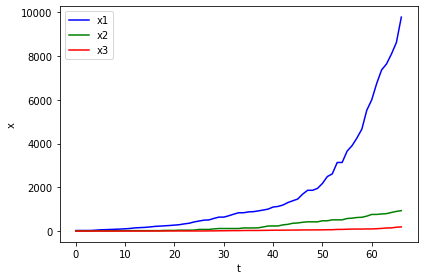

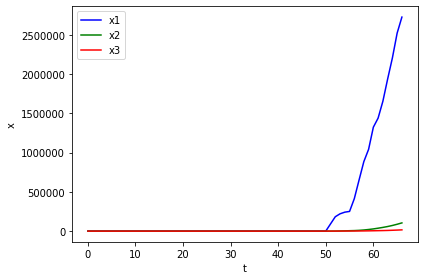

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import kal_python as kal

# 各種パラメータ
beta = 2.2/1*1000*5
sigma = 1.0/4.6/100/10000*2
xi = 1.0/280/1000
gamma = 1.0/5.0/100*2
delta = 0.01/10
N = 10.0 ** 9 # 人口
h = 1 # 1サイクルあたりの日数
dt = 1
T = 67 # 日数

# x = np.array([s,sigma,beta_gamma,xi,delta])
x0 = np.array([N*0.9,sigma,beta,gamma,xi,delta])# 初期値
y0 = np.array([26,9,0])

# 状態方程式
class dss_covid19:
    def __init__(self,x0,y0):
        self.x_pre = copy.deepcopy(x0)
        self.y_pre = copy.deepcopy(y0)
        
    def update(self,x):
        I,R,D = self.y_pre
        x_ = np.zeros(6)
        x_[0] = x[0] - x[2]*dt/N*x[0]*I + xi*dt*R
        x_[1] = x[1]
        x_[2] = x[2]
        x_[3] = x[3]
        x_[4] = x[4]
        x_[5] = x[5]
        self.x_pre = copy.deepcopy(x_)
        return x_
    
    def observation(self,x):
        I,R,D = self.y_pre
        y_ = np.zeros(3)
        y_[0] = I + dt*x[1]*(N-x[0]-I-R-D) - (x[3]+x[5])*dt*I
        y_[1] = R + x[3]*dt*I - x[4]*dt*R
        y_[2] = D + dt*x[5]*I
        self.y_pre = copy.deepcopy(y_)
        return y_

#パーティクルフィルタ用のパラメータ
covx = np.diag([1.0,0.0001,6.0,0.0001,0.0001,0.0001])**2
covy = np.diag([100,10,10])**2
Np = 1000 #粒子の数
corona = dss_covid19(x0,y0)
pf = kal.ParticleFilter(copy.deepcopy(corona),copy.deepcopy(x0),copy.deepcopy(y0),Np,covx,covy)

# データ読み込み
t = np.arange(0,T,1)
data = pd.read_csv('time_series_covid19/time_series_covid19_JPN.csv',header=None)
y = np.array(data)
# 描画
fig = kal.t_x_plot(3,T)
fig.show(t,y)

# パラメータ推定
x = np.zeros((6,T))
x[:,0]=x0
y[:,0]=y0
for i in range(1,T):
#    x[:,i] = corona.update(x[:,i-1])
#    y[:,i] = corona.observation(x[:,i])
    x[:,i] = pf.update(y[:,i])
    #print(x[:,i])
for i in range(1,T):
    y[:,i] = corona.observation(x[:,i])
fig = kal.t_x_plot(3,T)
fig.show(t,y)